# 1. Overview
In this notebook we will practice data visualization in Python using English Premier League data.

# 2. Load libraries
We'll use matplotlib, seaborn, and bokeh.

In [50]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 3. Import the data

In [8]:
data = pd.read_csv("epl_data.csv")

In [9]:
data.head(5)

,Unnamed: 0,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,1,Alexis Sanchez,Arsenal,28,LW,Attacker,65.0,4329,12.0,17.1,264,Americas,Chile,0,4,1,1,0
1,2,Mesut Ozil,Arsenal,28,AM,Attacker,50.0,4395,9.5,5.6,167,EU,Germany,0,4,1,1,0
2,3,Petr Cech,Arsenal,35,GK,Goalkeeper,7.0,1529,5.5,5.9,134,EU,Czech Republic,0,6,1,1,0
3,4,Theo Walcott,Arsenal,28,RW,Attacker,20.0,2393,7.5,1.5,122,United Kingdom,United Kingdom,0,4,1,1,0
4,5,Laurent Koscielny,Arsenal,31,CB,Defence,22.0,912,6.0,0.7,121,EU,France,0,4,1,1,0


In [16]:
data2 = data.loc[data["nationality"] == "Germany"].sort_values(by=["fpl_points"],ascending=False)
data2.head(5)

,Unnamed: 0,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
1,2,Mesut Ozil,Arsenal,28,AM,Attacker,50.0,4395,9.5,5.6,167,EU,Germany,0,4,1,1,0
245,246,Leroy Sane,Manchester+City,21,LW,Attacker,35.0,2302,8.5,8.8,105,EU,Germany,0,1,11,1,1
222,223,Emre Can,Liverpool,23,DM,Midfield,15.0,1253,5.0,6.6,104,EU,Germany,0,2,10,1,0
8,9,Shkodran Mustafi,Arsenal,25,CB,Defence,30.0,1877,5.5,4.0,90,EU,Germany,0,3,1,1,1
194,195,Robert Huth,Leicester+City,32,CB,Defence,5.0,748,5.0,0.6,88,EU,Germany,0,5,9,0,0


# 4. Start doing some EDA

## Using pandas
Use "plot" from pandas to create a scatter plot of Market Value against page views

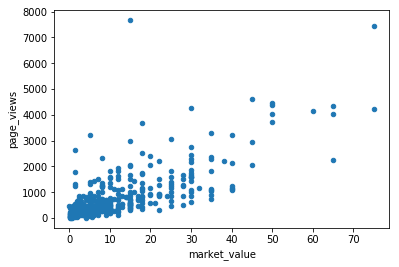

In [21]:
data.plot.scatter("market_value", "page_views")

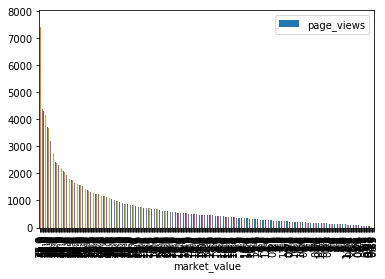

In [34]:
data.sort_values(by=["page_views"],ascending=False).plot.bar("market_value", "page_views")

## Using matplotlib

Text(0.5,1,'English Premier League Players')

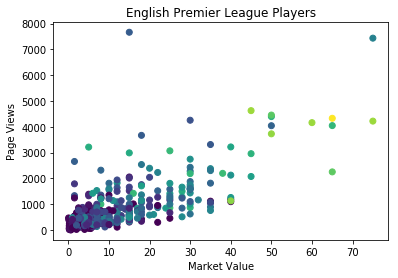

In [49]:
plt.scatter(data["market_value"], data["page_views"], c = data["fpl_points"])
plt.xlabel("Market Value")
plt.ylabel("Page Views")
plt.title("English Premier League Players")

In [48]:
data.loc[data["market_value"] > 45].sort_values(by="fpl_points", ascending = False).head(20)

,Unnamed: 0,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,1,Alexis Sanchez,Arsenal,28,LW,Attacker,65.0,4329,12.0,17.1,264,Americas,Chile,0,4,1,1,0
92,93,Eden Hazard,Chelsea,26,LW,Attacker,75.0,4220,10.5,2.3,224,EU,Belgium,0,3,5,1,0
377,378,Harry Kane,Tottenham,23,CF,Attacker,60.0,4161,12.5,35.1,224,United Kingdom,United Kingdom,0,2,17,1,0
260,261,Romelu Lukaku,Manchester+United,24,CF,Attacker,50.0,3727,11.5,45.0,221,EU,Belgium,0,2,12,1,0
240,241,Kevin De Bruyne,Manchester+City,26,AM,Attacker,65.0,2252,10.0,17.5,199,EU,Belgium,0,3,11,1,0
93,94,Diego Costa,Chelsea,28,CF,Attacker,50.0,4454,10.0,3.0,196,EU,Spain,0,4,5,1,0
241,242,Sergio Aguero,Manchester+City,29,CF,Attacker,65.0,4046,11.5,9.7,175,Americas,Argentina,0,4,11,1,0
1,2,Mesut Ozil,Arsenal,28,AM,Attacker,50.0,4395,9.5,5.6,167,EU,Germany,0,4,1,1,0
263,264,Paul Pogba,Manchester+United,24,CM,Midfield,75.0,7435,8.0,19.5,115,EU,France,0,2,12,1,1
104,105,N%27Golo Kante,Chelsea,26,DM,Midfield,50.0,4042,5.0,13.8,83,EU,France,0,3,5,1,1


## Using seaborn

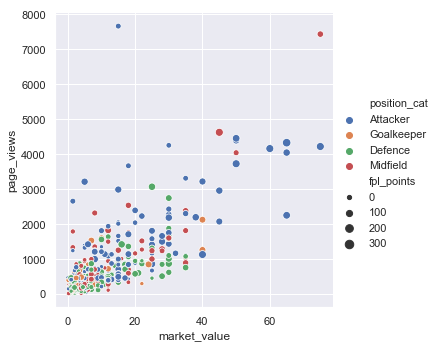

In [57]:
sns.relplot(x="market_value", y="page_views", data=data, hue = "position_cat", size = "fpl_points")

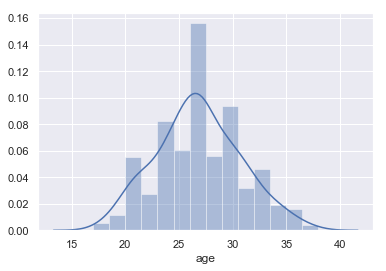

In [59]:
sns.distplot(data.age)

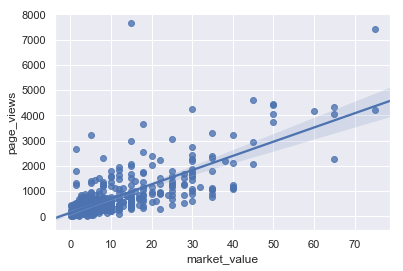

In [60]:
sns.regplot(x="market_value", y="page_views", data=data)

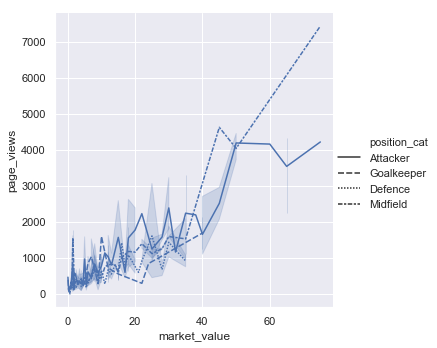

In [65]:
sns.relplot(x="market_value", y="page_views", data=data, facet_kws=dict(sharex=False), kind="line", legend="full", style="position_cat")

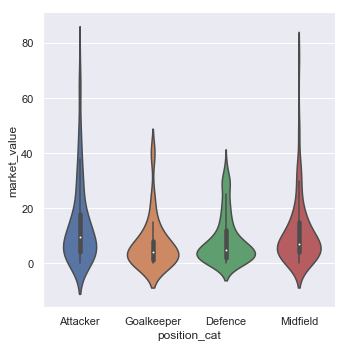

In [69]:
sns.catplot(x="position_cat", y="market_value", kind="violin", data=data)

## Using Bokeh

In [73]:
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_file, output_notebook, show
from bokeh.models import HoverTool
output_notebook()
#output_file(): shares graph as html

Loading BokehJS ...

In [79]:
# Create a datasource
source = ColumnDataSource(data)

#create the figure: p
p = figure(tools=["hover"])

# add circle glyphs to the figure p
p.circle("market_value", "page_views", source=source)
hover = HoverTool(tooltips=[("Name","@name"),("Position","@position_cat"),("age","@age")])

p.add_tools(hover)
show(p)